In [54]:
# kshape样例代码
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

print(X_train.shape)

# Keep first 3 classes and 50 first time series
X_train = X_train[y_train < 4]
X_train = X_train[:20]
X_train = X_train.reshape(20,-1)
print(X_train.shape)

possible_k_values = range(2, X_train.shape[0]//3)

# for wz in range(20):
#     plt.plot(X_train[wz,:])
#     plt.show()

numpy.random.shuffle(X_train)

# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
X_train = X_train.reshape(20,-1)
sz = X_train.shape[1]

calinski_scores = []


for k in possible_k_values:
    ks = KShape(n_clusters=k, verbose=True, random_state=seed)
    cluster_labels = ks.fit_predict(X_train)
#     print(cluster_labels.shape)
#     print(X_train.shape)
    calinski_score = calinski_harabasz_score(X_train, cluster_labels)
    calinski_scores.append(calinski_score)
# kShape clustering
# ks = KShape(n_clusters=3, verbose=True, random_state=seed)
# y_pred = ks.fit_predict(X_train)

# plt.figure()
# for yi in range(3):
#     plt.subplot(3, 1, 1 + yi)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.title("Cluster %d" % (yi + 1))

# plt.tight_layout()
# plt.show()
best_k_idx = np.argmax(calinski_scores)
best_k = possible_k_values[best_k_idx]

print("Best number of clusters based on Silhouette Score:", best_k)

(100, 275, 1)
(20, 275)
0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 0.005 --> 
0.005 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 
0.001 --> 0.001 --> 0.001 --> 
Resumed because of empty cluster
0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 
Best number of clusters based on Silhouette Score: 4


In [37]:
# 聚类降噪并提取特征
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, find_peaks
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import numpy as np
import math
from scipy.stats import skew, kurtosis

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean


data = np.load("data/test_without_resp.npy")
peaks = np.load("data/test_without_resp_peaks.npy")
# print(data.shape)

# for j in range(data.reshape[0]):

features_all = np.zeros(18)

# data.shape[0]

for j in range(5):
    signal = data[j,:1000]
    peaks2 = peaks[j,:]

    peaks2 = peaks2.astype(int)

#     print(peaks2)
    for i in range(len(peaks2)-1, 0, -1):
        if peaks2[i] == 0:
            peaks2 = np.delete(peaks2, i)
        else:
            break
#     print(peaks2)

    avg_index = (peaks2[::2] + peaks2[1::2]) // 2
    # print(avg_index)
    # plt.plot(signal)
    # plt.plot(peaks2,signal[peaks2],'o')
    # plt.show()

    # 使用这些平均数作为x的下标，将x切割成多个部分
    splits = np.split(signal, avg_index)

    max_length = max(len(split) for split in splits)

    # 补充每个部分使其长度相等
    padded_splits = [np.pad(split, (0, max_length - len(split))) for split in splits]

    # 将这些部分堆叠成一个二维数组
    stacked_array = np.vstack(padded_splits)

    stacked_array = np.delete(stacked_array, 0, axis=0)
    


    seed = 0
    np.random.seed(seed)
    X_train = stacked_array
    
#     X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
#     # Keep first 3 classes and 50 first time series
#     X_train = X_train[y_train < 4]
#     X_train = X_train[:50]
#     numpy.random.shuffle(X_train)
#     # For this method to operate properly, prior scaling is required
    
    X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
    sz = X_train.shape[1]
    print(X_train.shape[0])

    # kShape clustering
    ks = KShape(n_clusters=3, metric=euclidean,verbose=True, random_state=seed)
    y_pred = ks.fit_predict(X_train)

#     print(y_pred)
    
    plt.figure()
    for yi in range(3):
        plt.subplot(3, 1, 1 + yi)
        print(len(X_train[y_pred == yi]))
        for xx in X_train[y_pred == yi]:
#             print(yi)
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
#         plt.xlim(0, sz)
#         plt.ylim(-4, 4)
        plt.title("Cluster %d" % (yi + 1))

    plt.tight_layout()
    plt.show()

16


TypeError: __init__() got an unexpected keyword argument 'metric'

In [16]:
# 聚类降噪并提取特征
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, find_peaks
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import numpy as np
import math
from scipy.stats import skew, kurtosis


data = np.load("data/test_without_resp.npy")
peaks = np.load("data/test_without_resp_peaks.npy")
print(data.shape)

# for j in range(data.reshape[0]):

features_all = np.zeros(18)

for j in range(data.shape[0]):
    signal = data[j,:1000]
    peaks2 = peaks[j,:]

    peaks2 = peaks2.astype(int)

#     print(peaks2)
    for i in range(len(peaks2)-1, 0, -1):
        if peaks2[i] == 0:
            peaks2 = np.delete(peaks2, i)
        else:
            break
#     print(peaks2)

    avg_index = (peaks2[::2] + peaks2[1::2]) // 2
    # print(avg_index)
    # plt.plot(signal)
    # plt.plot(peaks2,signal[peaks2],'o')
    # plt.show()

    # 使用这些平均数作为x的下标，将x切割成多个部分
    splits = np.split(signal, avg_index)

    max_length = max(len(split) for split in splits)

    # 补充每个部分使其长度相等
    padded_splits = [np.pad(split, (0, max_length - len(split))) for split in splits]

    # 将这些部分堆叠成一个二维数组
    stacked_array = np.vstack(padded_splits)

    stacked_array = np.delete(stacked_array, 0, axis=0)


    # 打印结果
#     for i in range(stacked_array.shape[0]):
#         plt.plot(stacked_array[i, :])
#         plt.show()

    # plt.plot(signal3)
    # plt.plot(peaks2,signal3[peaks2],'o')
    # plt.show()

    import numpy as np
    from sklearn.metrics import mean_squared_error

    class PulseClustering:
        def __init__(self, threshold):
            self.threshold = threshold
            self.clusters = []

        def fit(self, pulses):
            for pulse in pulses:
                if not self.clusters:  # 如果聚类为空，创建第一个聚类
                    self.clusters.append([pulse])
                else:
                    for cluster in self.clusters:
                        center_pulse = np.mean(cluster, axis=0)  # 计算聚类中心
                        rmse = np.sqrt(mean_squared_error(center_pulse, pulse))  # 计算RMSE
                        if rmse < self.threshold:  # 如果RMSE低于阈值，将脉冲添加到聚类中
                            cluster.append(pulse)
                            break
                    else:  # 如果脉冲与现有的所有聚类的中心的RMSE都高于阈值，创建新的聚类
                        self.clusters.append([pulse])

        def get_clusters(self):
            return self.clusters


    threshold = 0.000005  # 这应该是一个你选择的阈值

    clustering = PulseClustering(threshold)
    clustering.fit(stacked_array)

    clusters = clustering.get_clusters()


    num_pulses_per_cluster = [len(cluster) for cluster in clusters]

    # 打印结果
#     for i, num_pulses in enumerate(num_pulses_per_cluster):
#         print(f"Cluster {i+1} contains {num_pulses} pulses.")

    max_cluster = max(clusters, key=len)

    
    
    
    # 计算最大聚类的平均脉冲
    average_pulse = np.mean(max_cluster, axis=0)

#     plt.plot(average_pulse)
    
    p1 = peaks2[1] - avg_index[0]
    for wz in range(10):
        if average_pulse[p1] < average_pulse[p1+1]:
            p1 = p1 + 1
        elif average_pulse[p1] < average_pulse[p1-1]:
            p1 = p1 - 1
        else:
            break
    
    p2 = peaks2[2] - avg_index[0]
    for wy in range(10):
        if average_pulse[p2] < average_pulse[p2+1]:
            p2 = p2 + 1
        elif average_pulse[p2] < average_pulse[p2-1]:
            p2 = p2 - 1
        else:
            break
    
#     plt.plot(p1, average_pulse[p1],'o')
#     plt.plot(p2, average_pulse[p2],'o')
    
#     plt.show()
    
    # 特征提取

    # 平均值
    # P1
    # P2
    # P1-P2
    # P1/P2
    # D12
    # D21
    # D11
    # D21/D12
    # Skew1
    # Skew2
    # Kurt1
    # Kurt2
    # 方差
    # PeakToPeak
    # Zero Crossing Rate
    # Energy 
    # 10s内有多少个周期

    
    
    
    
    import numpy as np
    import scipy.signal
    import scipy.stats

    # 假设 signal 是你的信号
    signal = average_pulse  # 示例信号，你可以用你的信号替换

    # 平均值
    mean_val = np.mean(signal)

    #  P1 P2
    P1 = signal[p1]
    P2 = signal[p2]
    
    # P1-P2
    # P1/P2
    # D12
    D12 = peaks2[1]-peaks2[0]
    
    # D21
    D21 = peaks2[2]-peaks2[1]
    
    # D11
    # D12/D21
    
    #Sk Ku
    Skew1 = skew(signal[:(p1+p2)//2])
    Skew2 = skew(signal[(p1+p2)//2:])
    Kurt1 = kurtosis(signal[:(p1+p2)//2])
    Kurt2 = kurtosis(signal[(p1+p2)//2:])
    
    # 方差
    variance = np.var(signal)

    # Peak to Peak值
    peak_to_peak = np.ptp(signal)

    # Zero Crossing Rate
    zcr = ((signal[:-1] * signal[1:]) < 0).sum()

    # Energy
    energy = np.sum(signal**2)
    
    # 10s内有多少个周期
    CPS = len(peaks2)/2/10
    
    features = np.array([mean_val,P1,P2,P1-P2,P1/P2,D12,D21,D12+D21,D12/D21,Skew1,Skew2,Kurt1,Kurt2,variance,peak_to_peak,zcr,energy,CPS])
    features_all = np.vstack([features_all, features])


#     print("Mean Value:", mean_val)
#     print("Variance:", variance)
#     print("Peak to Peak:", peak_to_peak)
#     print("Zero Crossing Rate:", zcr)
#     print("Energy:", energy)
#     print(Skew1,Skew2,Kurt1,Kurt2,CPS,P1, P2)

# feature = np.load("data/features_train_without_resp.npy")
# data = np.load("data/train_without_resp.npy")
# plt.plot(data[2,:1000])
# plt.show()
# print(feature[2,:])

(1909, 1006)


In [17]:
print(features_all.shape)
print(features_all[0,:])
features_all = features_all[1:,:]
print(features_all.shape)
np.save("data/features_test_without_resp.npy",features_all)

(1910, 18)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1909, 18)


In [56]:
# normalize
import numpy as np
from sklearn.preprocessing import MinMaxScaler

feature_train = np.load("data/features_train_without_resp.npy")
feature_test = np.load("data/features_test_without_resp.npy")


print(feature_train.shape)

scaler = MinMaxScaler()
feature_train_without_resp_norm = scaler.fit_transform(feature_train)
feature_test_without_resp_norm = scaler.transform(feature_test)
np.save("data/features_train_without_resp_norm.npy", feature_train_without_resp_norm)
np.save("data/features_test_without_resp_norm.npy", feature_test_without_resp_norm)

(3879, 18)


In [19]:
# Feature Selection
from scipy.stats import pearsonr


features = np.load("./data/features_test_without_resp_norm.npy")
data = np.load("./data/test_without_resp.npy")
target = data[:,1004]

# target = target.ravel()

# 计算每个特征和目标值之间的皮尔逊相关系数
correlations = [pearsonr(features[:, i], target) for i in range(features.shape[1])]

# 打印相关系数
for i, correlation in enumerate(correlations):
    print(f'Feature {i}: {correlation[0]}')


Feature 0: 0.16494339605260905
Feature 1: 0.0007699362256058653
Feature 2: 0.00028795964146322017
Feature 3: 0.0007169822405016651
Feature 4: -0.030926736457222243
Feature 5: 0.17126118587636302
Feature 6: -0.343479875619611
Feature 7: -0.029637391704047656
Feature 8: 0.9734766369769158
Feature 9: -0.30014591147256753
Feature 10: -0.3533278943009381
Feature 11: -0.37193977102227693
Feature 12: -0.3297073449292556
Feature 13: 0.14278054674492816
Feature 14: 0.03344318779722784
Feature 15: 0.01380197736669158
Feature 16: 0.07598738711728514
Feature 17: 0.029794424476385188


(3879, 1006)


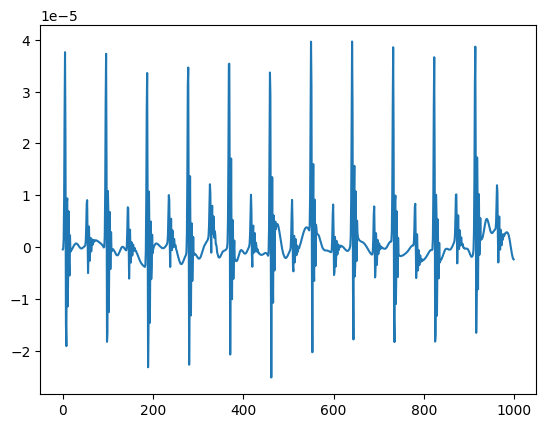

Cluster 1 contains 8 pulses.
Cluster 2 contains 2 pulses.


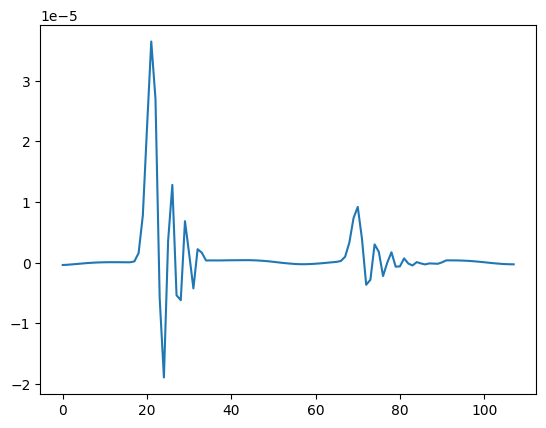

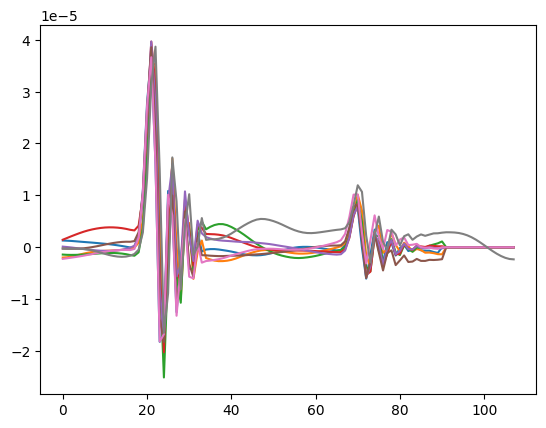

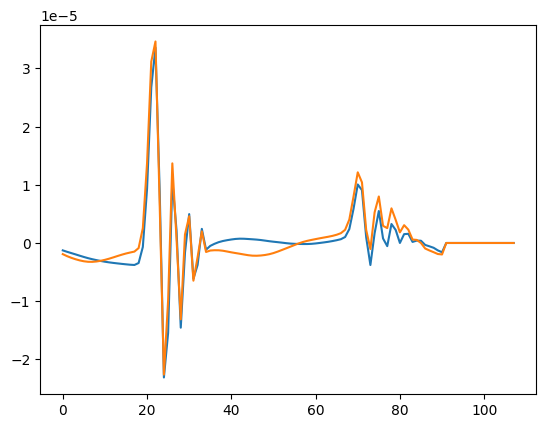

2


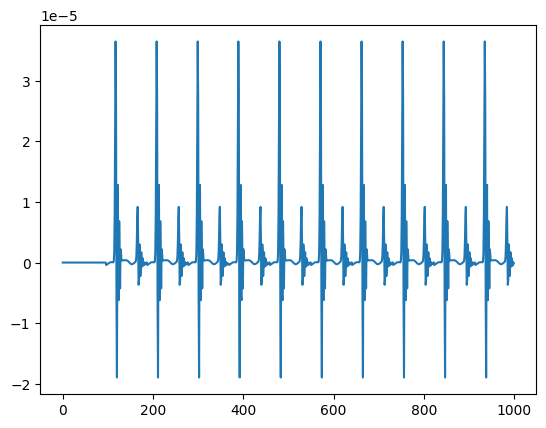

In [46]:
# 聚类降噪并提取特征
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, find_peaks
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import numpy as np
import math
from scipy.stats import skew, kurtosis


data = np.load("data/train_without_resp.npy")
peaks = np.load("data/train_without_resp_peaks.npy")
print(data.shape)

# for j in range(data.reshape[0]):

features_all = np.zeros(18)


signal = data[47,:1000]
peaks2 = peaks[47,:]

plt.plot(signal)
plt.show()

peaks2 = peaks2.astype(int)

#     print(peaks2)
for i in range(len(peaks2)-1, 0, -1):
    if peaks2[i] == 0:
        peaks2 = np.delete(peaks2, i)
    else:
        break
#     print(peaks2)

avg_index = (peaks2[::2] + peaks2[1::2]) // 2
# print(avg_index)
# plt.plot(signal)
# plt.plot(peaks2,signal[peaks2],'o')
# plt.show()

# 使用这些平均数作为x的下标，将x切割成多个部分
splits = np.split(signal, avg_index)

max_length = max(len(split) for split in splits)

# 补充每个部分使其长度相等
padded_splits = [np.pad(split, (0, max_length - len(split))) for split in splits]

# 将这些部分堆叠成一个二维数组
stacked_array = np.vstack(padded_splits)

stacked_array = np.delete(stacked_array, 0, axis=0)


# 打印结果
#     for i in range(stacked_array.shape[0]):
#         plt.plot(stacked_array[i, :])
#         plt.show()

# plt.plot(signal3)
# plt.plot(peaks2,signal3[peaks2],'o')
# plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

class PulseClustering:
    def __init__(self, threshold):
        self.threshold = threshold
        self.clusters = []

    def fit(self, pulses):
        for pulse in pulses:
            if not self.clusters:  # 如果聚类为空，创建第一个聚类
                self.clusters.append([pulse])
            else:
                for cluster in self.clusters:
                    center_pulse = np.mean(cluster, axis=0)  # 计算聚类中心
                    rmse = np.sqrt(mean_squared_error(center_pulse, pulse))  # 计算RMSE
                    if rmse < self.threshold:  # 如果RMSE低于阈值，将脉冲添加到聚类中
                        cluster.append(pulse)
                        break
                else:  # 如果脉冲与现有的所有聚类的中心的RMSE都高于阈值，创建新的聚类
                    self.clusters.append([pulse])

    def get_clusters(self):
        return self.clusters



threshold = 0.000005  # 这应该是一个你选择的阈值

clustering = PulseClustering(threshold)
clustering.fit(stacked_array)

clusters = clustering.get_clusters()


num_pulses_per_cluster = [len(cluster) for cluster in clusters]

# 打印结果
for i, num_pulses in enumerate(num_pulses_per_cluster):
    print(f"Cluster {i+1} contains {num_pulses} pulses.")

max_cluster = max(clusters, key=len)

# print(clusters.shape)


# 计算最大聚类的平均脉冲
average_pulse = np.mean(max_cluster, axis=0)
plt.plot(average_pulse)
plt.show()


for i in range(8):
    plt.plot(clusters[0][i])
plt.show()

for i in range(2):
    plt.plot(clusters[1][i])
plt.show()
print(len(clusters[1]))



def compose_big_signal(signal, positions, big_signal_length):
    big_signal = np.zeros(big_signal_length)
    signal_length = len(signal)
    for pos in positions:
        if pos + signal_length <= big_signal_length:
            big_signal[pos:pos+signal_length] = signal
        else:
            overlap = big_signal_length - pos
            big_signal[pos:] = signal[:overlap]
    return big_signal

# Example usage
big_signal_length = 1000
signal_length = len(average_pulse)
signal = average_pulse
positions = peaks2[1::2]

# Call the function to compose the big signal using the small signal and positions
result_signal = compose_big_signal(signal, positions, big_signal_length)
plt.plot(result_signal)
plt.show()
